# Week 7 Exercises  

***Karlie Schwartzwald  
DSC 550 Fall 2022  
Bellevue University***

**Change Control Log:**  

Change#: 1  
Change(s) Made:  Completed through Part 1 Step 6  
Date of Change:  10/13/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/16/2022  

Change#: 2  
Change(s) Made:  Completed Part 1 Step 7 through step 16 and Part 2.      
Date of Change:  10/14/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 10/16/2022  

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics

## Part 1: PCA and Variance Threshold in a Linear Regression

1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [2]:
# import dataset
housing_df = pd.read_csv("train.csv")

In [3]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [4]:
# Drop "Id" column
housing_df.drop(['Id'], axis=1, inplace=True)

In [5]:
# Count NaN values under each housing DataFrame column

# create an Empty DataFrame object
nan_df = pd.DataFrame(columns = ['Feature', 'Count NaN', 'Percent NaN'])

# iterate through columns, counting NaNs, add new info to nan_df
for column in housing_df.columns:
    count_nan = housing_df[column].isna().sum()
    percent_nan = count_nan/1460
    nan_df = nan_df.append({'Feature' : column, 'Count NaN' : count_nan, 'Percent NaN' : percent_nan}, ignore_index = True)

In [6]:
# Features with more than 40% NaN values
nan_df[nan_df['Percent NaN'] >= 0.4]

,Feature,Count NaN,Percent NaN
5,Alley,1369,0.937671
56,FireplaceQu,690,0.472603
71,PoolQC,1453,0.995205
72,Fence,1179,0.807534
73,MiscFeature,1406,0.963014


In [7]:
# drop columns
housing_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

3. For numerical columns, fill in any missing data with the median value.

In [8]:
# Find numerical columns with missing data
check_numerical_df = nan_df[(nan_df['Percent NaN'] < 0.4) & (nan_df['Percent NaN'] > 0)]

In [9]:
# Replace NaN with median value
for feature in check_numerical_df['Feature']:
    if housing_df[feature].dtypes == 'float64':
        housing_df[feature] = housing_df[feature].fillna(housing_df[feature].median())

4. For categorical columns, fill in any missing data with the most common value (mode).

In [10]:
# Find categorical columns and replace with mode of column
for column in housing_df.columns:
    if housing_df[column].dtypes == 'object':
        housing_df[column].fillna(housing_df[column].mode()[0], inplace=True)

5. Convert the categorical columns to dummy variables.

In [11]:
# The following numerical columns are categorical: MSSubClass
# Create dummy variables for MSSubClass
MSSubClass_dummie_df = pd.get_dummies(housing_df['MSSubClass'], prefix = 'MSSubClass')

In [12]:
# Change 'Object' type columns into dummy variables
dummie_df = pd.get_dummies(housing_df)
# Drop MSSubClass column
dummie_df.drop('MSSubClass', axis=1, inplace=True)

In [13]:
# Concatenate all dummy variables into same dataframe
merged_df = pd.concat([dummie_df,MSSubClass_dummie_df], axis=1)
merged_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,1,0,0,0,0,0,0,0,0,0
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,0,0,0,0,0,0,0
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,1,0,0,0,0,0,0,0,0
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,0,0,0,0,0,0,0


6. Split the data into a training and test set, where the SalePrice column is the target.

In [14]:
x = merged_df.drop('SalePrice', axis=1)
y = merged_df['SalePrice']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

7. Run a linear regression and report the R2-value and RMSE on the test set.

In [17]:
# Scale Features
from sklearn.preprocessing import StandardScaler

In [18]:
scaler1 = StandardScaler()
x_train = scaler1.fit_transform(x_train)
x_test = scaler1.transform(x_test)

In [19]:
# libraries
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train, y_train)

LinearRegression()

In [22]:
predict_y_train = model.predict(x_train)
predict_y_test = model.predict(x_test)

In [23]:
import sklearn.metrics as metrics

In [24]:
train_mae = metrics.mean_absolute_error(y_train, predict_y_train)
train_mse = metrics.mean_squared_error(y_train, predict_y_train)
train_rmse = np.sqrt(train_mse) 
train_r2 = metrics.r2_score(y_train, predict_y_train)

In [25]:
test_mae = metrics.mean_absolute_error(y_test, predict_y_test)
test_mse = metrics.mean_squared_error(y_test, predict_y_test)
test_rmse = np.sqrt(test_mse) 
test_r2 = metrics.r2_score(y_test,predict_y_test)

In [26]:
print(f' The R2 value for the train data is {train_r2}.')
print(f'\n The RMSE value for the train data is {train_rmse}.')
print(f'\n The MAE value for the train data is {train_mae}.')
print(f'\n\n The R2 value for the test data is {test_r2}.')
print(f'\n The RMSE value for the test data is {test_rmse}.')
print(f'\n The MAE value for the test data is {test_mae}.')

 The R2 value for the train data is 0.9313021579389946.

 The RMSE value for the train data is 21545.41524929483.

 The MAE value for the train data is 13813.088516306905.


 The R2 value for the test data is -2.8007703961997356e+23.

 The RMSE value for the test data is 3.724353829593974e+16.

 The MAE value for the test data is 4222436046693092.5.


8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [27]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [28]:
# Standardize the feature matrix
scaler2 = StandardScaler()
features = scaler2.fit_transform(x_train)

In [29]:
# Create a PCA that will retain 90% of variance
pca = PCA(n_components=0.90)

In [30]:
# Conduct PCA
features_pca = pca.fit_transform(features)

 9. How many features are in the PCA-transformed matrix?

In [31]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 284
Reduced number of features: 139


10. Transform but DO NOT fit the test features with the same PCA.

In [32]:
test_features_pca = pca.transform(x_test)

11. Repeat step 7 with your PCA transformed data.

In [33]:
pca_model = LinearRegression()

In [34]:
pca_model.fit(features_pca, y_train)

LinearRegression()

In [35]:
predict_y_train = pca_model.predict(features_pca)
predict_y_test = pca_model.predict(test_features_pca)

In [36]:
train_mae = metrics.mean_absolute_error(y_train, predict_y_train)
train_mse = metrics.mean_squared_error(y_train, predict_y_train)
train_rmse = np.sqrt(train_mse) 
train_r2 = metrics.r2_score(y_train, predict_y_train)

In [37]:
test_mae = metrics.mean_absolute_error(y_test, predict_y_test)
test_mse = metrics.mean_squared_error(y_test, predict_y_test)
test_rmse = np.sqrt(test_mse) 
test_r2 = metrics.r2_score(y_test,predict_y_test)

In [38]:
print(f' The R2 value for the train data is {train_r2}.')
print(f'\n The RMSE value for the train data is {train_rmse}.')
print(f'\n The MAE value for the train data is {train_mae}.')
print(f'\n\n The R2 value for the test data is {test_r2}.')
print(f'\n The RMSE value for the test data is {test_rmse}.')
print(f'\n The MAE value for the test data is {test_mae}.')

 The R2 value for the train data is 0.8905767022064955.

 The RMSE value for the train data is 27191.816502031077.

 The MAE value for the train data is 17547.299854380457.


 The R2 value for the test data is 0.871484761038007.

 The RMSE value for the test data is 25228.38758636577.

 The MAE value for the test data is 18489.95429145841.


12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
minmaxscaler = MinMaxScaler()

In [41]:
features_mm = minmaxscaler.fit_transform(x_train, y_train)

13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [42]:
# Load libraries
from sklearn.feature_selection import VarianceThreshold

In [43]:
# Create thresholder
thresholder = VarianceThreshold(threshold=0.1)

In [44]:
# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(features_mm)

14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [45]:
test_features_mm = minmaxscaler.transform(x_test)
test_features_high_variance = thresholder.transform(test_features_mm)

15. Repeat step 7 with the high variance data.

In [46]:
model3 = LinearRegression()

In [47]:
model3.fit(features_high_variance, y_train)

LinearRegression()

In [48]:
predict_y_train = model3.predict(features_high_variance)
predict_y_test = model3.predict(test_features_high_variance)

In [49]:
train_mae = metrics.mean_absolute_error(y_train, predict_y_train)
train_mse = metrics.mean_squared_error(y_train, predict_y_train)
train_rmse = np.sqrt(train_mse) 
train_r2 = metrics.r2_score(y_train, predict_y_train)

In [50]:
test_mae = metrics.mean_absolute_error(y_test, predict_y_test)
test_mse = metrics.mean_squared_error(y_test, predict_y_test)
test_rmse = np.sqrt(test_mse) 
test_r2 = metrics.r2_score(y_test,predict_y_test)

In [51]:
print(f' The R2 value for the train data is {train_r2}.')
print(f'\n The RMSE value for the train data is {train_rmse}.')
print(f'\n The MAE value for the train data is {train_mae}.')
print(f'\n\n The R2 value for the test data is {test_r2}.')
print(f'\n The RMSE value for the test data is {test_rmse}.')
print(f'\n The MAE value for the test data is {test_mae}.')

 The R2 value for the train data is 0.6761544351996862.

 The RMSE value for the train data is 46779.146956541816.

 The MAE value for the train data is 31471.94703196347.


 The R2 value for the test data is 0.6418002663613961.

 The RMSE value for the test data is 42118.6856045159.

 The MAE value for the test data is 31538.750684931507.


16. Summarize your findings.

The error was insanely high when we had too many features. The error metrics vastly improved with the pca-transformed matrix. The transformation of removing low-variance data also was a huge improvement over the regular linear regression.

## Part 2: Categorical Feature Selection

Based on several categorical features, you will predict whether or not a mushroom is edible or poisonous.

1. Import the mushroom data as a data frame and ensure it is loaded correctly.

In [52]:
# import dataset
mushroom_df = pd.read_csv("mushrooms.csv")

In [53]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [54]:
mushroom_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [55]:
x = mushroom_df.drop('class', axis=1)
y = mushroom_df['class']

2. Convert the categorical features (all of them) to dummy variables.

In [56]:
x = pd.get_dummies(x)

3. Split the data into a training and test set.

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

4. Fit a decision tree classifier on the training set.

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Create Decision Tree classifer object
d_tree = DecisionTreeClassifier()

In [60]:
# Train Decision Tree Classifer
d_tree = d_tree.fit(x_train, y_train)

In [61]:
#Predict the response for test dataset
y_test_predict = d_tree.predict(x_test)

In [62]:
y_test

6842    p
5447    p
459     e
712     e
5223    e
       ..
8060    p
3099    e
366     e
3507    e
3787    p
Name: class, Length: 2031, dtype: object

5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [63]:
accuracy_df = pd.DataFrame()
accuracy_df['y_test'] = y_test
accuracy_df['y_predict'] = y_test_predict
accuracy_df['compare'] = np.where(accuracy_df['y_test'] == accuracy_df['y_predict'], 1, 0)

In [64]:
accuracy_score = (accuracy_df['compare'].sum())/2031*100
print(f'The calculated accuracy of the model is {accuracy_score}%.')

The calculated accuracy of the model is 100.0%.


In [65]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_test_predict))

Accuracy: 1.0


In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [67]:
# Create confusion matrix
confus_matrix = confusion_matrix(y_test, y_test_predict)

In [68]:
# Create pandas dataframe
dataframe = pd.DataFrame(confus_matrix)

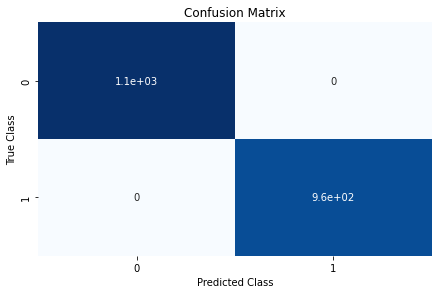

In [69]:
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

6. Create a visualization of the decision tree.

In [70]:
from sklearn import tree

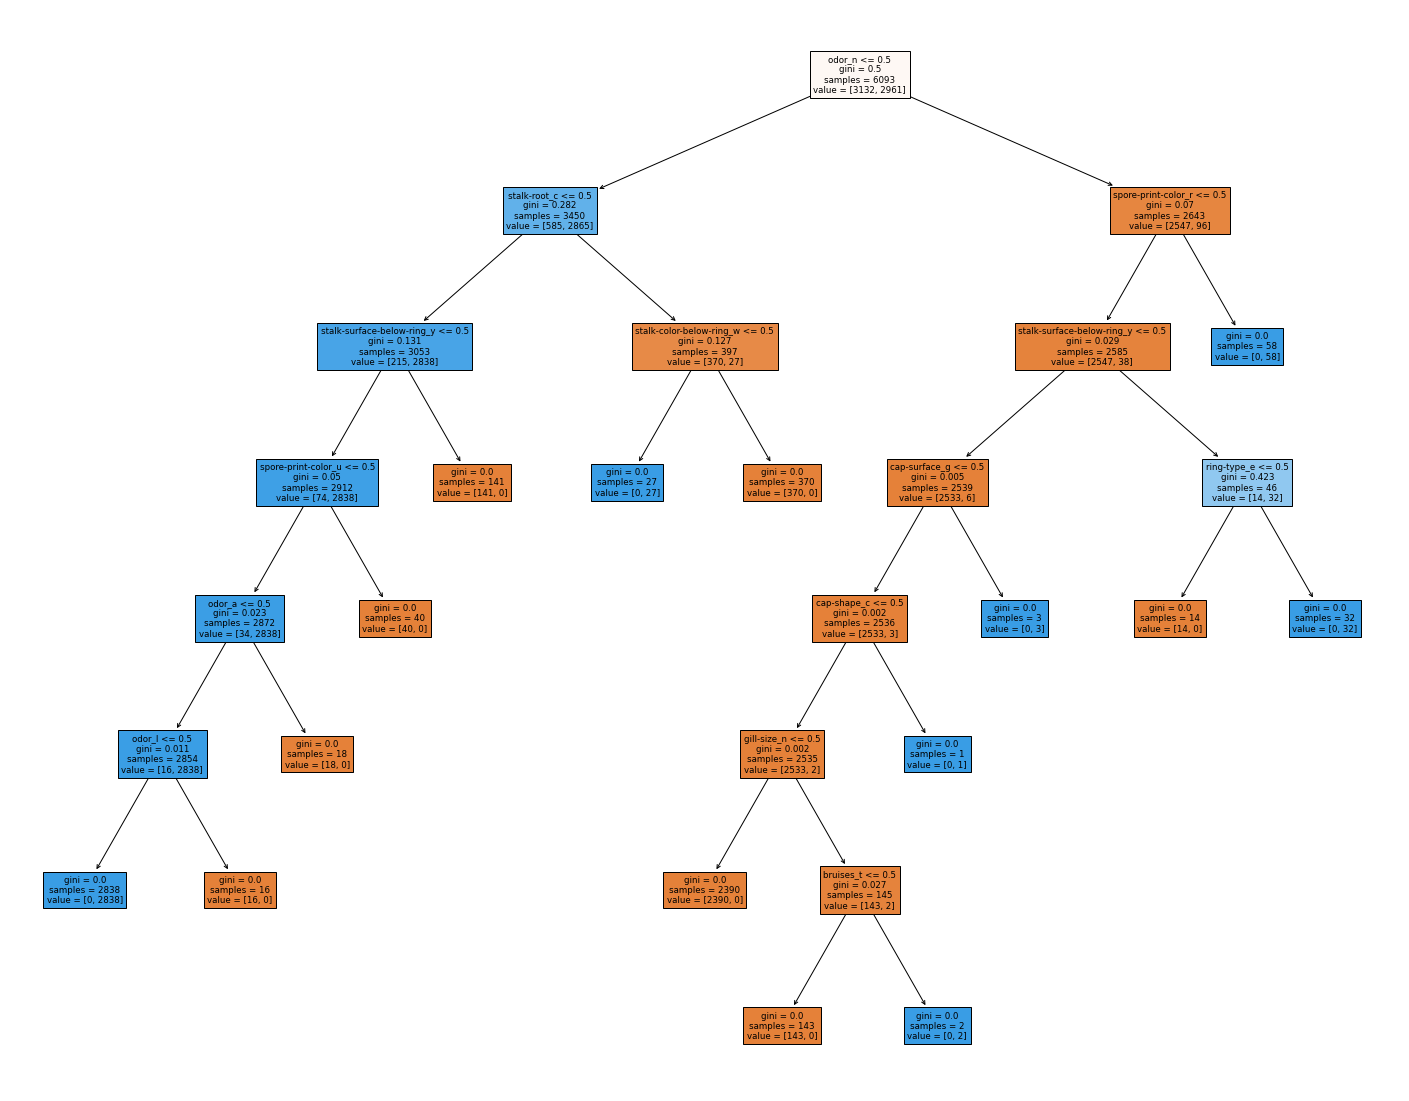

In [71]:
fig = plt.figure(figsize=(25,20))
tree_plot = tree.plot_tree(d_tree, feature_names=x_train.columns, filled=True)

7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [72]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [73]:
# Convert to categorical data by converting data to integers
features = x_train.astype(int)
test_features = x_test.astype(int)

In [74]:
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, y_train)

In [75]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 117
Reduced number of features: 5


8. Which five features were selected in step 7? Hint: Use the get_support function.

In [76]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]
test_features_df_new = test_features.iloc[:,cols]
list(features_df_new.columns)

['odor_f',
 'odor_n',
 'gill-color_b',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k']

9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [77]:
# Create Decision Tree classifer object
d_tree2 = DecisionTreeClassifier()

In [78]:
# Train Decision Tree Classifer
d_tree2 = d_tree2.fit(features_df_new, y_train)

In [79]:
#Predict the response for test dataset
y_test_predict = d_tree2.predict(test_features_df_new)

In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_test_predict))

Accuracy: 0.9364844903988183


In [81]:
# Create confusion matrix
confus_matrix = confusion_matrix(y_test, y_test_predict)

In [82]:
# Create pandas dataframe
dataframe = pd.DataFrame(confus_matrix)

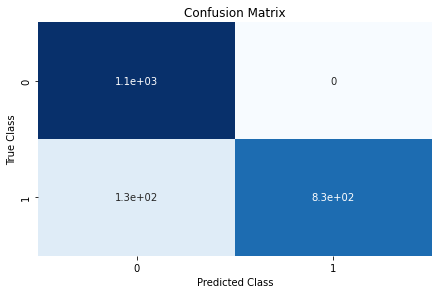

In [83]:
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

10. Summarize your findings.

We dropped 112 features and only lost 7% accuracy. Given that modeling with 117 features is computationally expensive, this seems like a huge improvement for not that much loss of accuracy with our model predictions.